In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [47]:
#Get the numerical variables from our dataset.
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [48]:
numericals.isnull().sum()/len(numericals)

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

In [49]:
#Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as st
from ipywidgets import interactive
from ipywidgets import interact, fixed, interact_manual
plt.style.use('seaborn')


In [40]:
%matplotlib inline

def plot_t_dist_cdf_ppf(x_value, degrees_of_freedom=2):
    
    x = np.linspace(-5,5,1000)
    area = np.linspace(0,1,1000)
    
    y_pdf = st.t.pdf(x,df=degrees_of_freedom) 
    y_cdf = st.t.cdf(x,df=degrees_of_freedom) 
    y_ppf = st.t.ppf(x,df=degrees_of_freedom)
    
    y_single_pdf = st.t.pdf(x_value,df=degrees_of_freedom)
    y_single_cdf = st.t.cdf(x_value,df=degrees_of_freedom)
    y_single_ppf = st.t.ppf(y_single_cdf,df=degrees_of_freedom)
       
    fig, axes = plt.subplots(1,3,figsize=(20, 6))

    axes[0].plot(x, y_pdf, label='pdf')
    axes[0].set_title("Distribution")
    axes[0].set_xlabel("x")
    axes[0].set_xlim(-6,6)
    axes[0].vlines(x_value, ymin=0, ymax=y_single_pdf, color="black")

    axes[1].plot(x, y_cdf, label='cdf')
    axes[1].set_title("CDF")
    axes[1].set_xlabel("x")
    axes[1].vlines(x_value, ymin=0, ymax=y_single_cdf, color = "black")
    axes[1].hlines(y_single_cdf,xmin=-5,xmax=x_value,color="black")
    axes[1].set_ylabel("Area under the curve")

    axes[2].plot(x, y_ppf, label='ppf')
    axes[2].set_title("PPF")
    axes[2].set_xlabel("Area under the curve")
    axes[2].vlines(y_single_cdf, ymin=-10, ymax=y_single_ppf,color = "black")
    axes[2].hlines(x_value,xmin=0,xmax=y_single_cdf,color="black")
    axes[2].set_ylabel("X value")
    
    plt.show();

interact(plot_t_dist_cdf_ppf, 
         x_value = widgets.FloatSlider(value=0, min=-5 , max=5, step=0.01), 
         degrees_of_freedom = widgets.IntSlider(value=2, min=2, max=5, step=1))

interactive(children=(FloatSlider(value=0.0, description='x_value', max=5.0, min=-5.0, step=0.01), IntSlider(v…

<function __main__.plot_t_dist_cdf_ppf(x_value, degrees_of_freedom=2)>

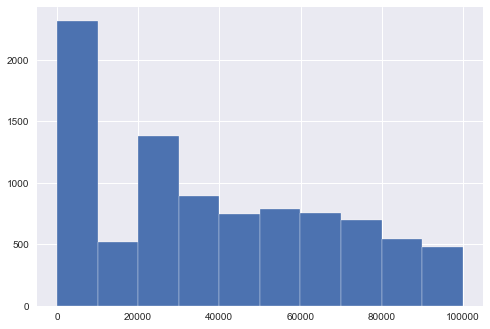

In [50]:
numericals['Income'].hist();

In [51]:
numericals['Income'].mean()

37657.38000875848

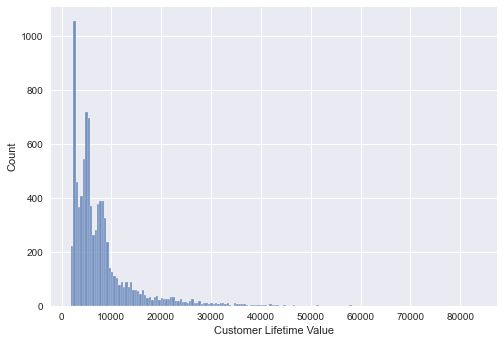

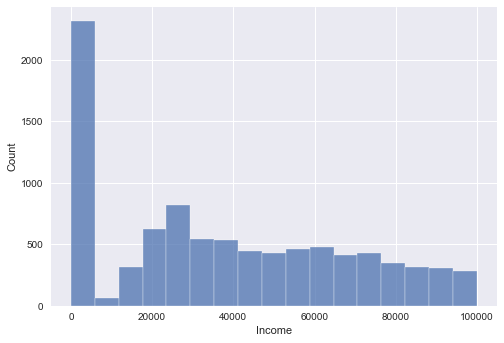

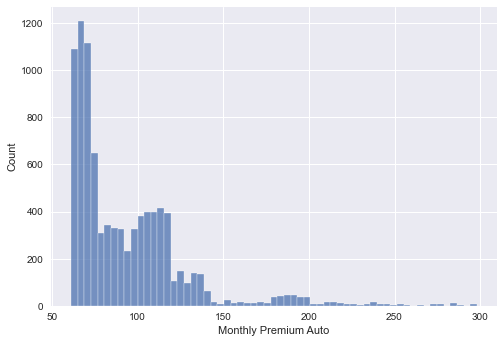

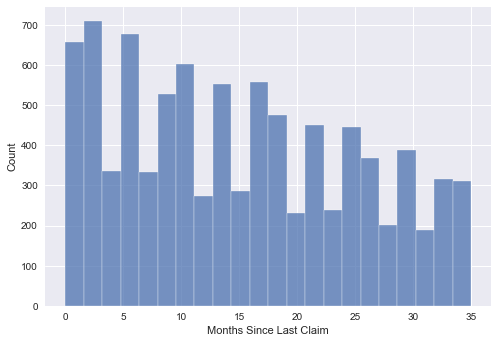

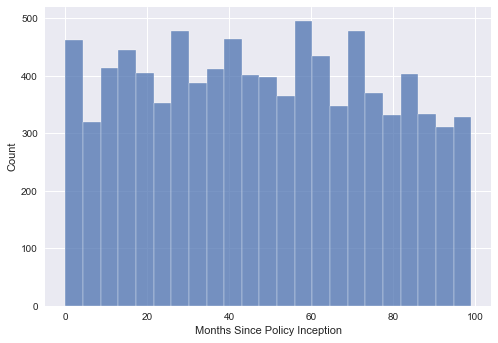

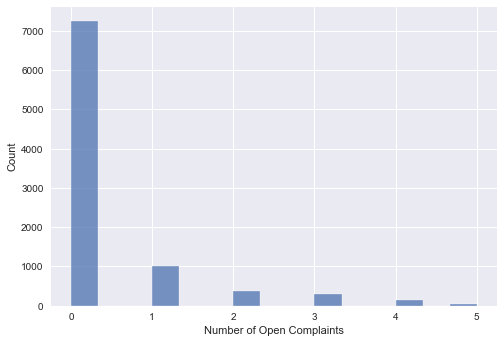

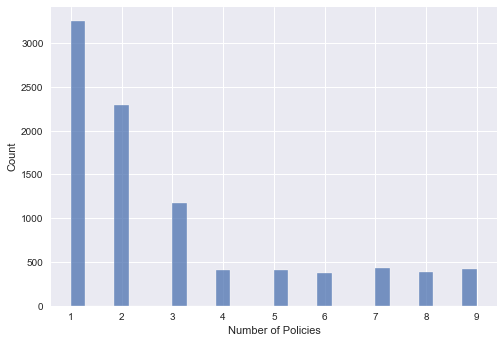

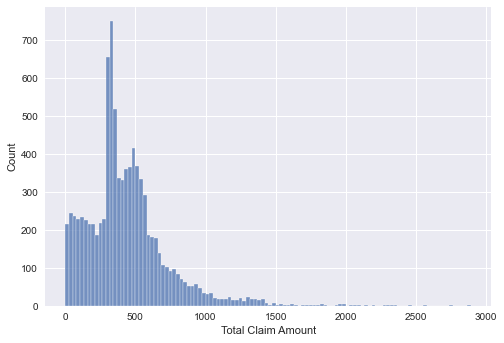

In [52]:
def numericals_plot(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numericals_plot(numericals)

In [53]:
numericals_log = np.log(numericals)

C:\Users\NON\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [54]:
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
numericals_log = np.log(numericals)

In [55]:
display (numericals_log)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,-inf,0.000000,5.952753
1,8.850738,-inf,4.543295,2.564949,3.737670,-inf,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,-inf,0.693147,6.339428
3,8.941920,-inf,4.663439,2.890372,4.174387,-inf,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,-inf,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,-inf,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,-inf,0.000000,5.938064
9131,9.007476,-inf,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,-inf,1.098612,6.538429


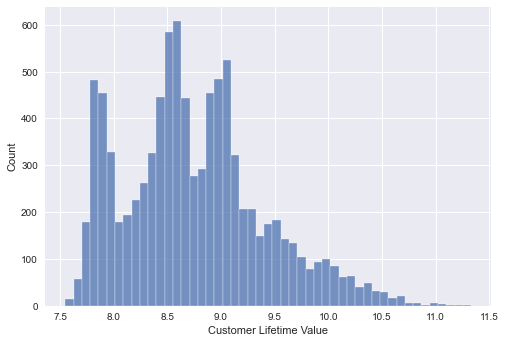

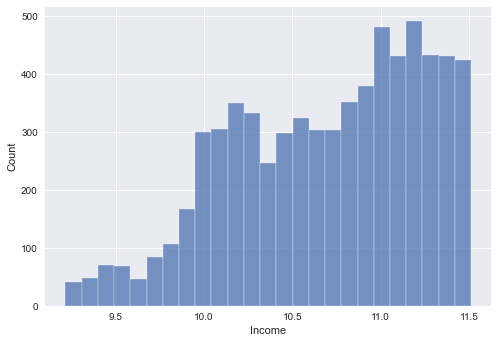

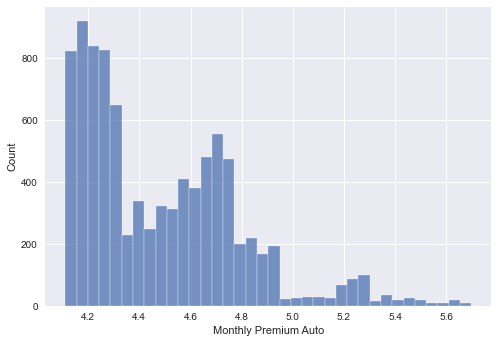

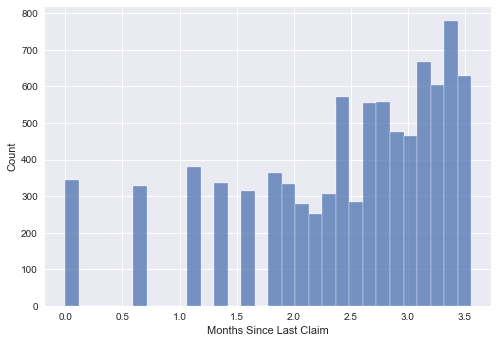

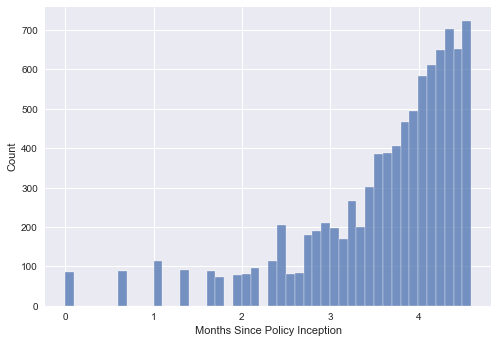

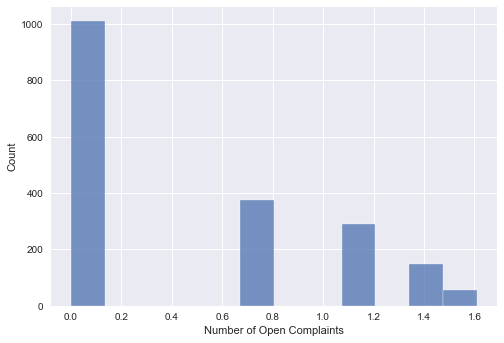

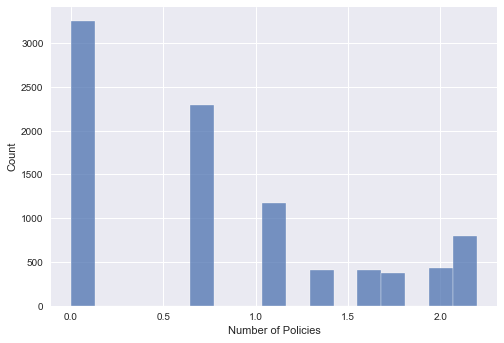

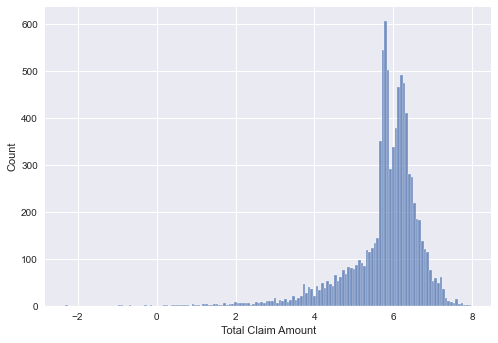

In [56]:
def numericals_plot2(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numericals_plot(numericals_log)

In [ ]:
# yes all the result changes